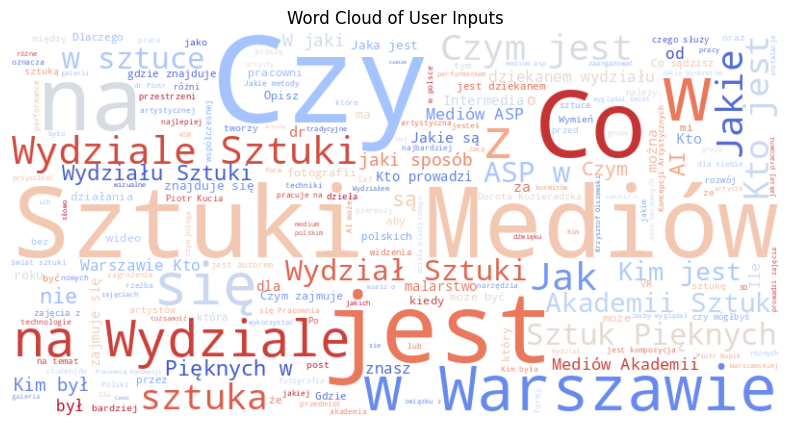

In [19]:
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import cm

# Specify the directory containing JSON files
directory = "./conversations"

# Initialize containers
user_inputs = []
feedback_types = []

# Read and process JSON files
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            data = json.load(file)
            if "messages" in data:
                for message in data["messages"]:
                    # Collect user_input
                    user_inputs.append(message.get("user_input", ""))
                    
                    # Handle feedback types
                    feedback = message.get("feedback")
                    if feedback and isinstance(feedback, dict):
                        feedback_types.append(feedback.get("type", "null"))
                    else:
                        feedback_types.append("null")

# Generate a word cloud from user inputs
wordcloud_text = " ".join(user_inputs)
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(wordcloud_text)



# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of User Inputs")
plt.show()

# Count feedback types
feedback_counter = Counter(feedback_types)


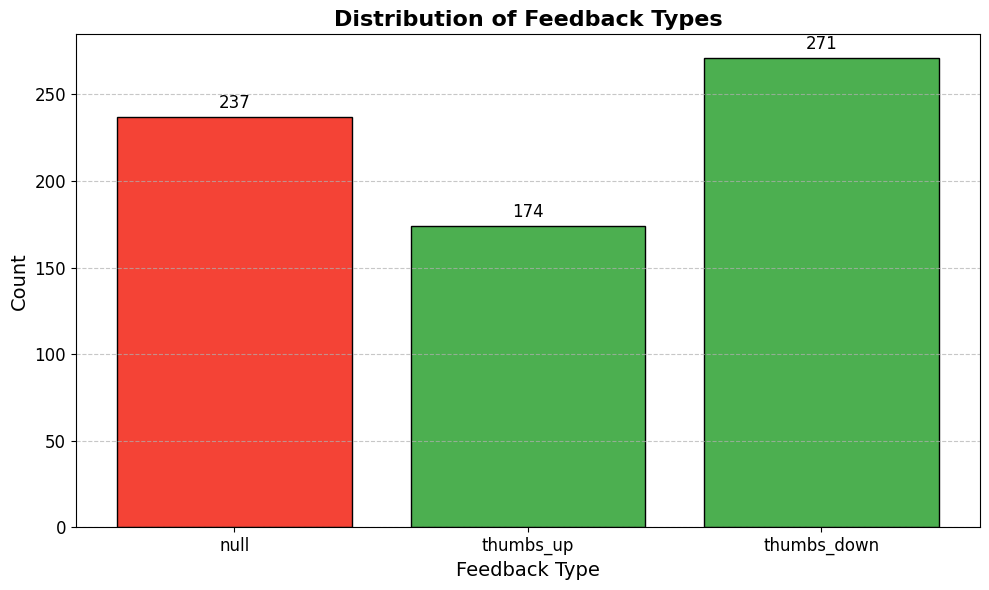

In [18]:
import matplotlib.pyplot as plt

# Custom colors for feedback types
colors = {
    'null': '#F44336',          # Red
    'thumbs_up': '#4CAF50',     # Green
    'thumbs_down': '#4CAF50'    # Green
}

# Extract unique feedback types and counts
feedback_labels = feedback_counter.keys()
feedback_counts = feedback_counter.values()

# Bar colors based on feedback type
bar_colors = [colors[label] for label in feedback_labels]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(feedback_labels, feedback_counts, color=bar_colors, edgecolor='black')

# Add value annotations above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', fontsize=12, color='black')

# Add title and labels with professional formatting
plt.title("Distribution of Feedback Types", fontsize=16, fontweight='bold')
plt.xlabel("Feedback Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add light gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a modern, clean style
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
feedback_counter

Counter({'thumbs_down': 271, 'null': 237, 'thumbs_up': 174})

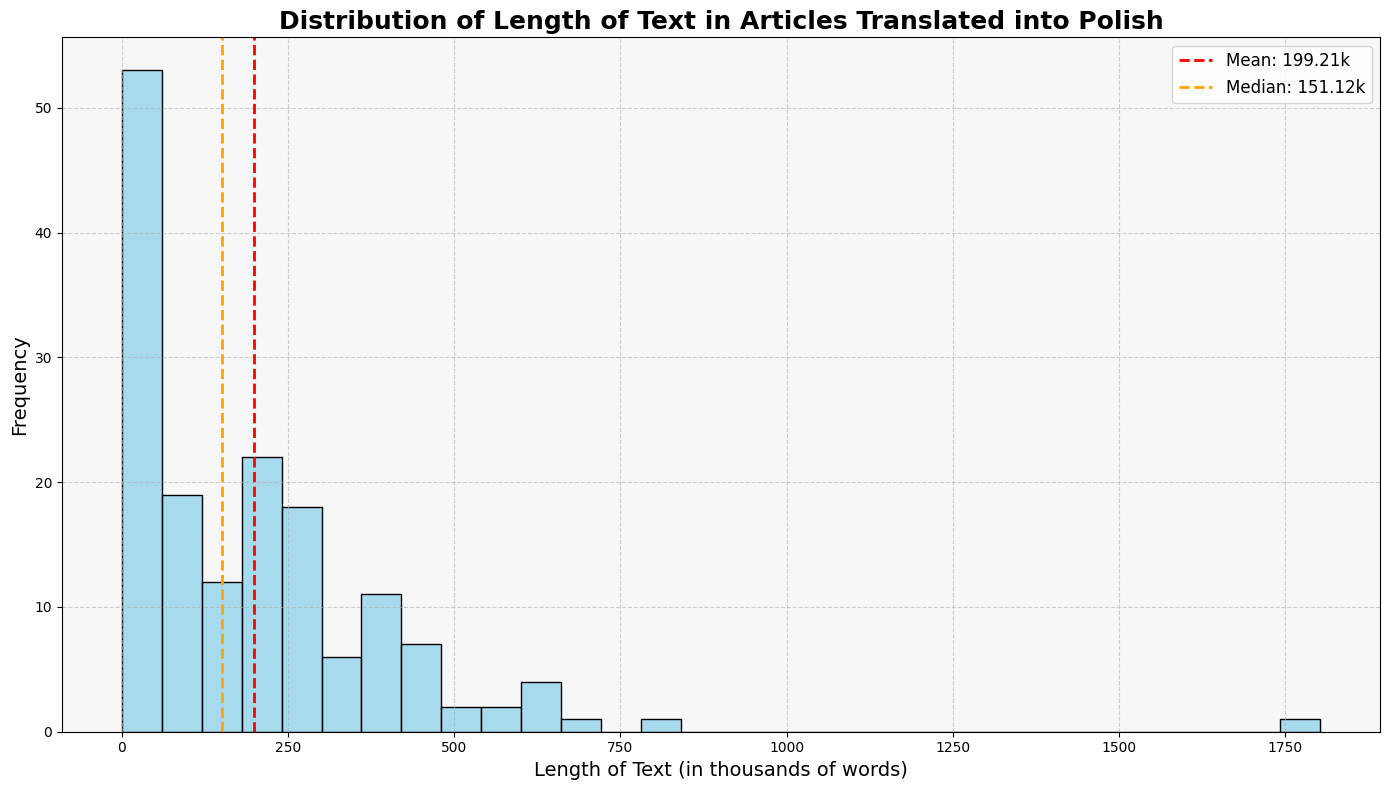

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the folder containing text files
folder_path = "./pl-20241211T202327Z-001/pl"

# Read text files and calculate their lengths
text_lengths = []
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text_lengths.append(len(text))

# Convert text lengths to thousands of words
text_lengths = [length / 1000 for length in text_lengths]

# Calculate mean and median
mean_length = np.mean(text_lengths)
median_length = np.median(text_lengths)

# Create the histogram
plt.figure(figsize=(14, 8))
sns.histplot(text_lengths, bins=30, kde=False, color="skyblue", alpha=0.7, edgecolor="black")

# Add mean and median lines
plt.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.2f}k')
plt.axvline(median_length, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_length:.2f}k')

# Customize grid and background
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

# Add labels and title
plt.title("Distribution of Length of Text in Articles Translated into Polish", fontsize=18, fontweight='bold')
plt.xlabel("Length of Text (in thousands of words)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


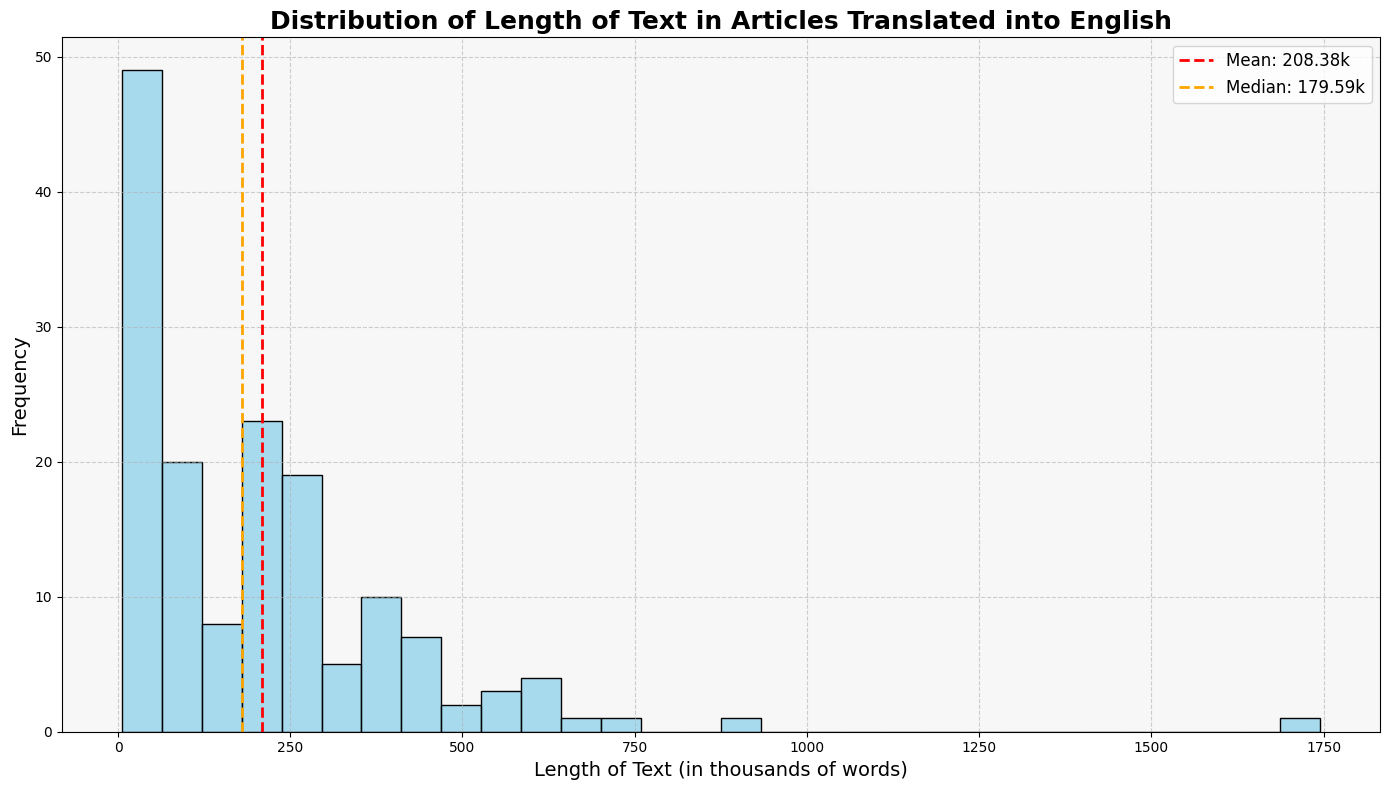

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the folder containing text files
folder_path = "./en-20241211T202306Z-001/en"

# Read text files and calculate their lengths
text_lengths = []
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text_lengths.append(len(text))

# Convert text lengths to thousands of words
text_lengths = [length / 1000 for length in text_lengths]

# Calculate mean and median
mean_length = np.mean(text_lengths)
median_length = np.median(text_lengths)

# Create the histogram
plt.figure(figsize=(14, 8))
sns.histplot(text_lengths, bins=30, kde=False, color="skyblue", alpha=0.7, edgecolor="black")

# Add mean and median lines
plt.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.2f}k')
plt.axvline(median_length, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_length:.2f}k')

# Customize grid and background
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

# Add labels and title
plt.title("Distribution of Length of Text in Articles Translated into English", fontsize=18, fontweight='bold')
plt.xlabel("Length of Text (in thousands of words)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
